# Syria Telecommunication Company
# Predicting SyriaTel Customer Churn

Team members:
- Tasha Kanyiva - Lead
- Andrew Maina
- Emmanuellar Karisa
- Mercy Ronoh
- Ashley Simiyu
- Diana Mbuvi

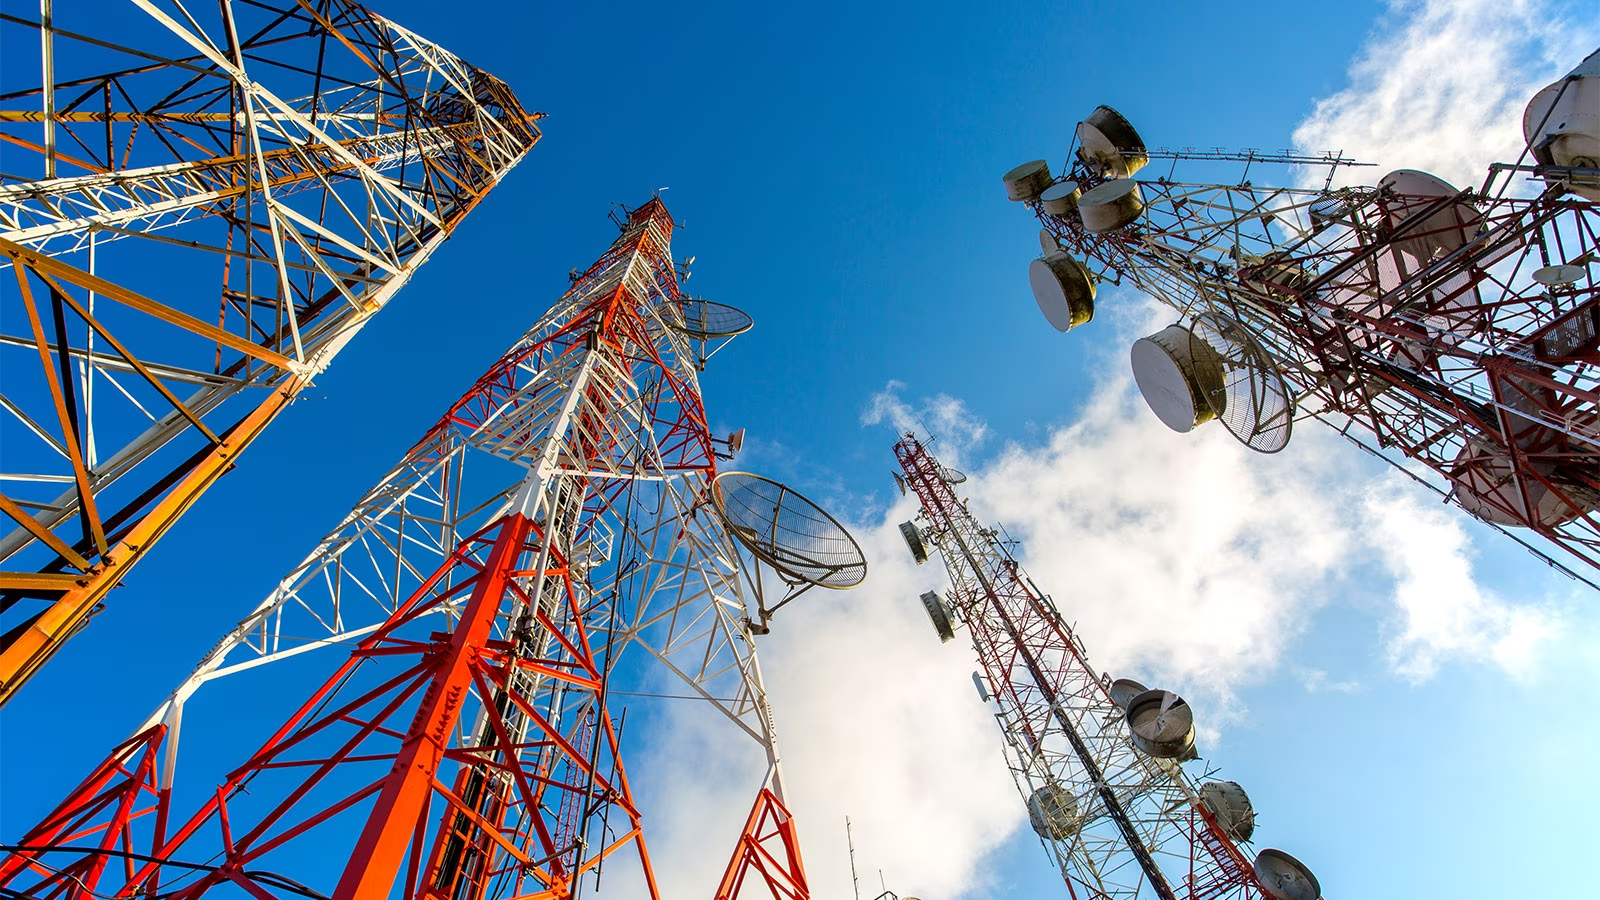

# 1. Business Understanding

## Overview

SyriaTel is a telecommunications company facing the challenge of customer churn, meaning the customers are cancelling or not renewing their subcriptions, which is causing revenue losses. The company wants to understand the factors influencing customer churn and develop predictive models to identify customers likely to churn soon. The stakeholders include executives, product managers, marketing teams, finance and account teams, and the contact center team at SyriaTel.

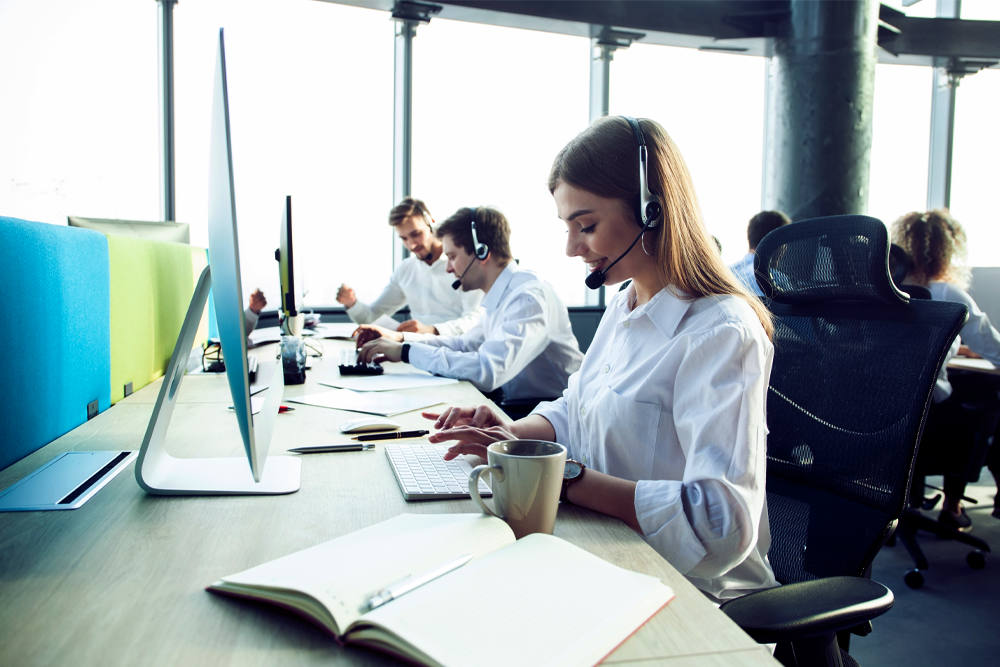


##  Business Problem

The primary business problem is to analyze customer behavior to identify patterns that lead to churn. By analyzing relevant customer data, SyriaTel aims to develop focused customer retention programs. The goal is to use predictive models to predict which customers are likely to churn, allowing the company to take proactive measures to retain them. This involves analyzing customer activity data and developing strategies to improve customer satisfaction and loyalty, ultimately reducing churn rates and increasing revenue.

## Business Objective

The business objective for SyriaTel is to reduce customer churn by developing predictive models that can accurately identify customers at risk of cancelling their subscriptions. This involves analyzing customer activity data to understand the factors influencing churn and using this knowledge to create targeted retention strategies. By successfully implementing these strategies,SyriaTel aims to increase customer satisfaction, loyalty, and ultimately, revenue.

# Data Understanding

Asa group, we concluded to work with the Telcom Churn Dataset which we obtained from [Kaggle](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/data). The dataset contains 667 rows and 20 columns. Each row represents a customer and each column contains customer’s attributes. The dataset has the following attributes or features:
- state - Residence state of the cutomer
- account length - the number of days the customer has had an account	
- area code -	Area code of the customer
- phone number - Customer's registered phone number
- international plan -	yes if customer has an internation plan and no if not
- voice mail plan -	yes if customer has a voicemail plan  and no if not
- number vmail messages -	number of customers vocemail messages
- total day minutes -	total minutes the customer was in call for during daytime
- total day calls -	total calls the customer made at daytime
- total day charge -	total amount the customer was charged by Syria for calls made during the day
- total eve minutes -	total minutes the customer was in call for during the evening
- total eve calls -	total calls the customer made during the evening
- total eve charge -	total amount the customer was charged by Syria for calls made during the evening
- total night minutes -	total minutes the customer was in call for at night
- total night calls -	total calls the customer made at night
- total night charge -	total amount the customer was charged by Syria for calls made during at night
- total intl minutes -	total minutes the customer was in international calls
- total intl calls -	total international calls made by the customer
- total intl charge -	total amount the cutomer was charged by Syria on international calls
- customer service calls -	total number of calls the customer made to Syria customer service
- churn -	true if customer dicontinued services and false otherwise

## Exploratory Data Analysis

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    train_test_split,
    cross_val_score,
    KFold,
    StratifiedKFold
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    average_precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    auc,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
# load the data
dt = pd.read_csv('./datasets/telecom_churn.csv')

# looking at the first 5 rows  
dt.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [10]:
# checking for missing values
dt.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Clearly there are no missing values. This dataset had been cleaned by the time we are using it for analysis

In [11]:
# checking the datatypes
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are no missing values in the dataset. Let us check for duplicates:

In [12]:
# checking for any duplicates
dt.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [13]:
# Obtaining the unique values
dt['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
WA     66
NV     66
CO     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [14]:
dt['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [15]:
dt['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [16]:
dt['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [17]:
dt['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [18]:
dt['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

From the dataset, it shows majority of the customers have not churned but still the company has lost over 400 customers. We need to investigate why is this the case for the churned customers.

In [19]:
# dropping unneccessary columns
dt = dt.drop('phone number', axis=1)

In [20]:
# converting the false and true to 0 and 1 respectively on the churn column
dt['churn'] = dt['churn'].astype(int)

In [21]:
dt['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [22]:
dt

state  account length  area code international plan voice mail plan  \
0       KS             128        415                 no             yes   
1       OH             107        415                 no             yes   
2       NJ             137        415                 no              no   
3       OH              84        408                yes              no   
4       OK              75        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 no             yes   
3329    WV              68        415                 no              no   
3330    RI              28        510                 no              no   
3331    CT             184        510                yes              no   
3332    TN              74        415                 no             yes   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6            

## Data visualization

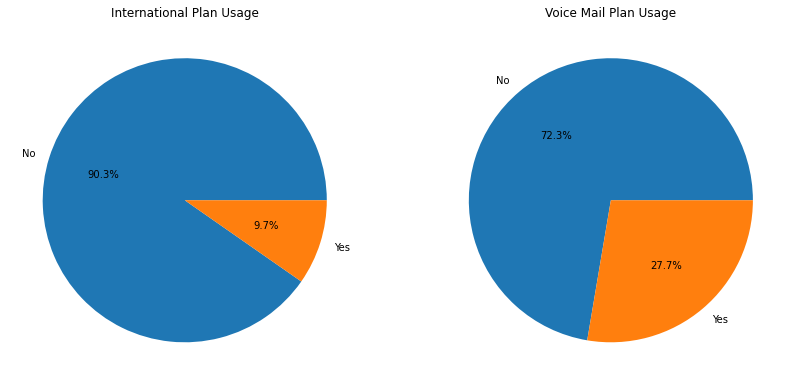

In [19]:
# Assuming dt is your DataFrame
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for 'international plan'
y_international_plan = dt['international plan'].value_counts()
axes[0].pie(y_international_plan, labels=['No', 'Yes'], autopct='%1.1f%%')
axes[0].set_title('International Plan Usage')

# Pie chart for 'voice mail plan'
y_voice_mail_plan = dt['voice mail plan'].value_counts()
axes[1].pie(y_voice_mail_plan, labels=['No', 'Yes'], autopct='%1.1f%%')
axes[1].set_title('Voice Mail Plan Usage')

plt.show()

The international plan pie chart shows that only 9.7% of customers do not have an international plan while 90.3% do have an international plan.

The voicemail plan pie chart indicates that 72.3% of customers in Syria Telecommunication have a voice mail plan.

In [20]:
# # encoding the international plan and voicemail plan
dt_dummies = pd.get_dummies(dt, columns=['international plan', 'voice mail plan'] , drop_first=True)
dt_dummies.sample(14)

state  account length  area code  number vmail messages  \
3091    VA             117        408                      0   
1171    TX              32        408                      0   
2225    NH              93        408                      0   
2861    CA              75        415                     19   
1593    KS             105        415                      0   
3113    HI             108        415                      0   
1226    AR             109        510                      0   
390     WV              43        415                      0   
1109    ID             118        415                      0   
2334    AL             119        415                      0   
481     NV             124        408                      0   
1364    CT             115        415                      0   
64      NC              38        408                      0   
2636    SD             104        408                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
3091               97.1               98             16.51              228.0   
1171              157.9               88             26.84              180.8   
2225              179.3               93             30.48              188.8   
2861              210.3               90             35.75              241.8   
1593              273.9              119             46.56              278.6   
3113              291.6               99             49.57              221.1   
1226              170.7              101             29.02              240.2   
390               168.4              125             28.63              243.8   
1109              140.4              112             23.87              187.1   
2334               98.8               97             16.80              146.9   
481               151.1              123             25.69              187.4   
1364              245.0               97             41.65              250.7   
64                131.2               98             22.30              162.9   
2636              200.2               92             34.03              118.7   

      total eve calls  total eve charge  total night minutes  \
3091              131             19.38                240.0   
1171              132             15.37                132.5   
2225               65             16.05                253.2   
2861               87             20.55                215.7   
1593              103             23.68                255.3   
3113               93             18.79                229.2   
1226               82             20.42                119.0   
390                89             20.72                214.7   
1109               60             15.90                207.9   
2334               68             12.49                190.7   
481               104             15.93                255.4   
1364               75             21.31                270.2   
64                 97             13.85                159.0   
2636               87             10.09                236.6   

      total night calls  total night charge  total intl minutes  \
3091                111               10.80                10.6   
1171                102                5.96                12.8   
2225                 88               11.39                12.1   
2861                102                9.71                13.1   
1593                 90               11.49                10.9   
3113                110               10.31                14.0   
1226                112                5.36                11.4   
390                 102                9.66                11.1   
1109                155                9.36                 7.9   
2334                105                8.58                10.0   
481                  93               11.49                 5.3   
1364                124               12.16                13.7

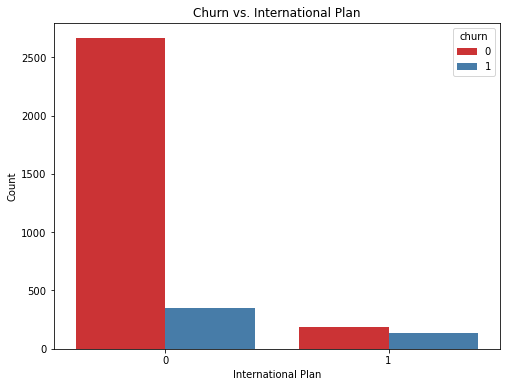

In [24]:
#plotting a bargraph of churn vs international plan
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan_yes', hue='churn', data=dt_dummies, palette='Set1')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.title('Churn vs. International Plan')
plt.show()

From the graph, the customers who do not have an international plan end up unsubscribing from the Syria Telecommunication services more than those who do have an international plan. 

Remember 0 is False meaning not churned while 1 is True showing churned

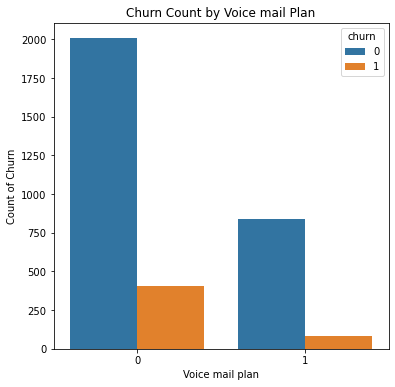

In [25]:
#plotting a bargraph of churn vs voicemail plan
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='voice mail plan_yes',data=dt_dummies,hue='churn')
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by Voice mail Plan')
plt.show()

The graph above shows that majority of the customers do not use voice mail plans but the rate at which they churn is higher than of those who actually use the voice mail plan

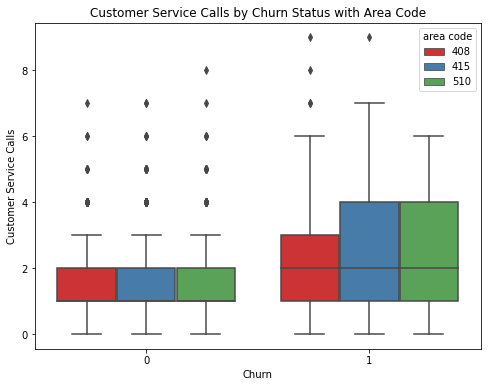

In [26]:
# plot the distribution of customer service calls for each churn status, with the different Area code 
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer service calls', hue='area code', data=dt, palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.title('Customer Service Calls by Churn Status with Area Code')
plt.show()


It seems that the area codes with the highest churning is Area code 415 and Area code 510. This is caused by the customer service calls the have experienced with the company.

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.barplot(x='churn', y='total day minutes', hue='total day charge', data=dt, palette='Set1')
# plt.xlabel('Churn Status')
# plt.ylabel('Value')
# plt.title('Total Day Minutes and Total Day Charge by Churn Status')
# plt.legend(title='Total Day Charge', loc='upper right')

# plt.show()

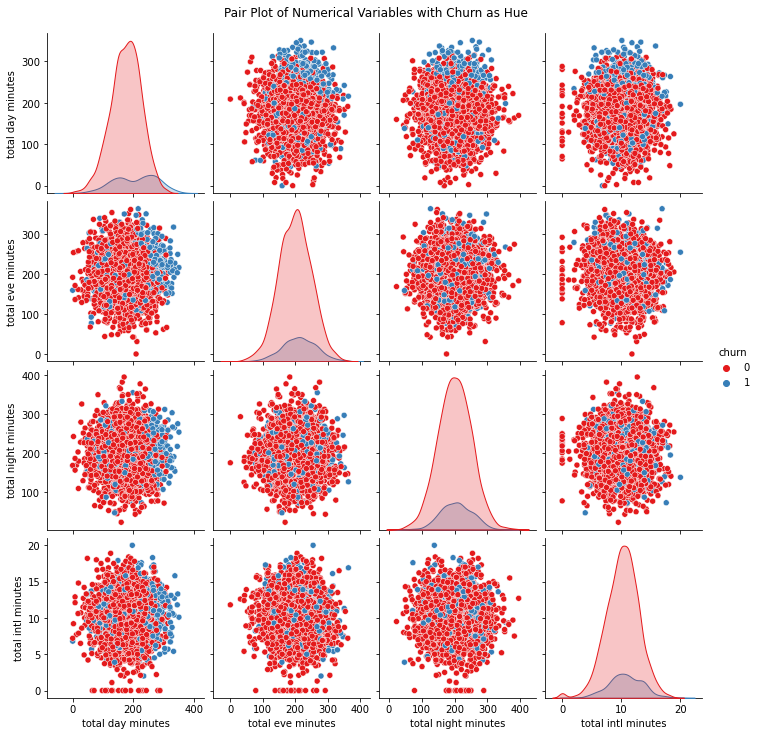

In [28]:
# Pair plot of numerical variables with churn as hue
numerical_vars = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
sns.pairplot(dt, vars=numerical_vars, hue='churn', palette='Set1')
plt.suptitle('Pair Plot of Numerical Variables with Churn as Hue', y=1.02)
plt.show()


# Modeling
